In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

## Закружаем данные и обрабатываем признаки


Тут куча обработок признаков, надо просто запустить все эти ячейки и забыть про них =)

In [178]:
df = pd.read_csv('mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)


columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")', 'Цвет', 'Оптическая стабилизация','Оптический зум на увеличение (x)',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Гарантия предоставляется', 'Страна', 'Основная камера МПикс','Съемка видео в портретном режиме', 'Фронтальная камера МПикс',
                  'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']


df = df[columns_needed + target + ['product_id', 'name']]
df[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df['memory2'] = df["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df['memory3'] = df["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df['memory4'] = df["name"].apply(lambda x: get_memory_from_name(x))
df['memory'] = df.apply(choose, axis=1)

df = df.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df['height1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df['width1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df['depth1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df['height2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df['width2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df['depth2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df['height'] = df.apply(choose_h, axis=1)
df['width'] = df.apply(choose_w, axis=1)
df['depth'] = df.apply(choose_d, axis=1)

df = df.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df['video_resolution_v'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df['video_resolution_h'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df['screen_resolution_h'] = df["Разрешение экрана"].apply(lambda x: get_res_0(x))
df['screen_resolution_v'] = df["Разрешение экрана"].apply(lambda x: get_res_1(x))

df['screen_diag'] = df["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df = df.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df['dust_IP'] = df["Степень защиты"].apply(lambda x: get_dust_IP(x))
df['water_IP'] = df["Степень защиты"].apply(lambda x: get_water_IP(x))

df = df.drop(columns=["Степень защиты"])

df['zoom'] = df['Цифровой зум (x)']
df['weight'] = df['Вес (г)']
df['kernel_cnt'] = df['Количество ядер']
df['screen_technology'] = df['Технология экрана']
df['power'] = df['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df['frame_has_metal'] = df['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df['frame_has_plastic'] = df['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df = df.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [179]:
df['is_new'] = df['Состояние'].apply(lambda x: 0 if x == 'восстановленный' else 1)
df = df.drop(columns=['Состояние'])

iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

df['standarts'] = df['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
df['battery'] = df.apply(fill_iphone_capacity, axis=1)
mean_battery = df['Емкость аккумулятора (мАч)'].mean()

df['is_5G'] = df['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
df['is_5G'] = df['is_5G'].astype(int)

df['frameless'] = (df['Безрамочный'] == 'Да').astype(int)


def get_year(x):
    if x >= 2022.0:
        return int(x)
    return 2022

df['year'] = np.where(df['Год релиза'] != 2028, df['Год релиза'], 2023)
df['year'] = df['year'].apply(lambda x: get_year(x))

df = df.rename(columns={'Количество основных камер (шт)' : 'main_cams'})

In [180]:
# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'Оптический зум на увеличение (x)'
]

df[columns_to_fill] = df[columns_to_fill].fillna(0)
df[['Съемка видео в портретном режиме','Оптическая стабилизация']] = df[['Съемка видео в портретном режиме', 'Оптическая стабилизация']].fillna("Нет")

# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

df['camera_mp_parsed'] = df['Основная камера МПикс'].apply(parse_camera)
df['front_camera'] = df['Фронтальная камера МПикс'].apply(parse_camera)


df['opt_zoom'] = df['Оптический зум на увеличение (x)']
df = df.drop(columns=['Основная камера МПикс', 'Фронтальная камера МПикс', 'Страна',
                           'Оптический зум на увеличение (x)', 'Гарантия предоставляется','Оптическая стабилизация', 'Съемка видео в портретном режиме', 'Емкость аккумулятора (мАч)'])
df['front_camera_mp_total'] = df['front_camera'].apply(lambda x: sum(x) if isinstance(x, list) else 0)
df['main_camera_mp_total'] = df['camera_mp_parsed'].apply(lambda x: sum(x) if isinstance(x, list) else 0)

df = df.drop(columns=['front_camera', 'camera_mp_parsed'])

In [181]:
df['brand_Apple'] = (df['brand'] == 'Apple').astype(int)
df['brand_Samsung'] = (df['brand'] == 'Samsung').astype(int)
df['brand_Xiaomi'] = (df['brand'] == 'Xiaomi').astype(int)
df['brand_Tecno'] = (df['brand'] == 'Tecno').astype(int)
df['brand_HONOR'] = (df['brand'] == 'HONOR').astype(int)
df['brand_HUAWEI'] = (df['brand'] == 'HUAWEI').astype(int)
df['brand_Infinix'] = (df['brand'] == 'Infinix').astype(int)
df['strong_frame'] = df['frame_has_metal'] - df['frame_has_plastic']
df = df.drop(columns=['frame_has_metal', 'frame_has_plastic'])

df = df.drop(columns=['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")', 'Цвет',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Безрамочный', 'product_id', 'name', 'kernel_cnt', 'screen_technology', 'standarts', 'power'])

## Какие-то интересные факты про данные

In [182]:
X = df.drop(columns='salePrice')
y = np.log(df['salePrice'])

X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)

### Мультиколлениарность

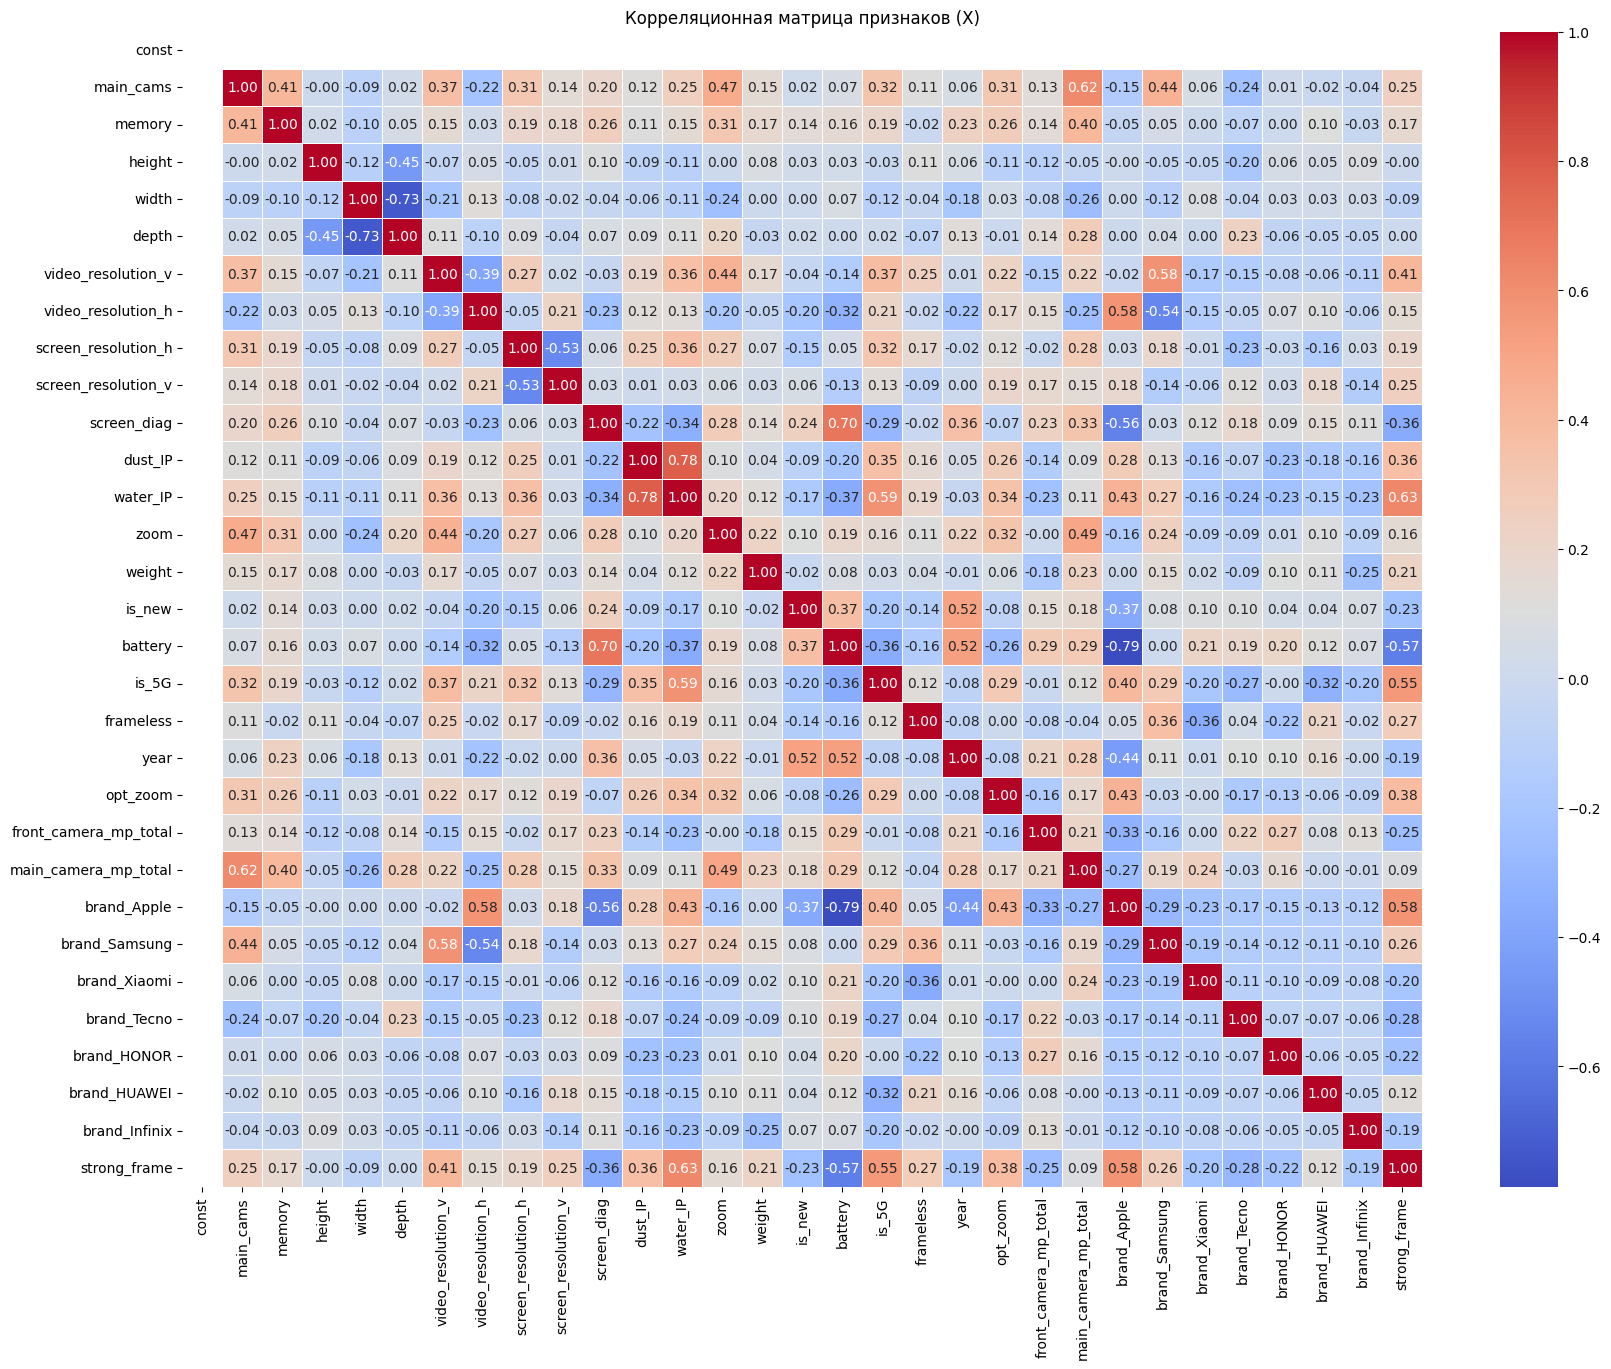

In [183]:
corr_matrix = X_filled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X)")
plt.show()

### VIF

Тоже показывает мультиколлениарность между переменными (если > 5)

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.preprocessing import StandardScaler

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                  feature       VIF
0             brand_Apple  9.870583
1                   depth  8.542697
2                   width  6.542193
3                 battery  5.462524
4                water_IP  5.379111
5            strong_frame  4.442066
6           brand_Samsung  4.153618
7                  height  3.767653
8                 dust_IP  3.292562
9    main_camera_mp_total  3.267930
10     video_resolution_h  3.225892
11    screen_resolution_h  3.103757
12                  is_5G  3.096500
13    screen_resolution_v  3.052016
14              main_cams  2.988218
15            screen_diag  2.631178
16     video_resolution_v  2.430543
17           brand_HUAWEI  2.293055
18                   zoom  2.168234
19           brand_Xiaomi  2.134353
20                   year  2.130298
21               opt_zoom  2.057209
22  front_camera_mp_total  2.022238
23            brand_Tecno  1.776077
24              frameless  1.702473
25            brand_HONOR  1.649715
26                 is_new  1

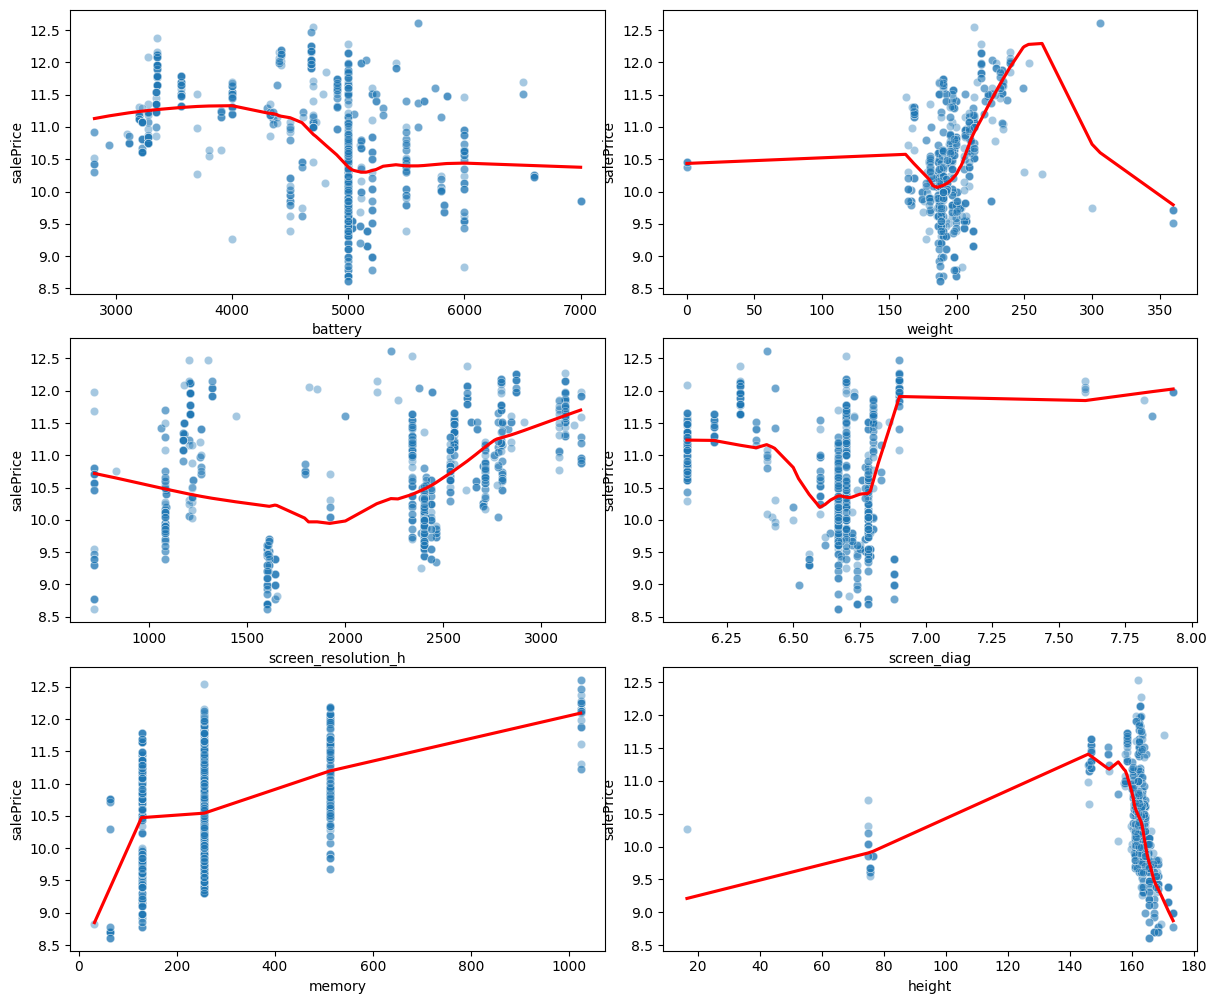

In [185]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
num_vars = ["battery", "screen_resolution_h", "memory", "weight", "screen_diag", "height"]
fig.tight_layout()
for ind, col in enumerate(num_vars):
    sns.scatterplot(ax=axes[ind % 3, ind // 3], x=df[col], y=np.log(df["salePrice"]), alpha=0.4)
    sns.regplot(
        ax=axes[ind % 3, ind // 3],
        x=df[col], y=np.log(df["salePrice"]),
        scatter=False, lowess=True, color="red"
    )

## Регрессия

Обычная, без всяких модификаций

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(
    X_filled, y, test_size=0.3, random_state=42
)

In [187]:
model_sm = sm.OLS(y_train, X_train).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          2.00e-293
Time:                        22:59:21   Log-Likelihood:                -67.530
No. Observations:                 650   AIC:                             197.1
Df Residuals:                     619   BIC:                             335.8
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -124.85

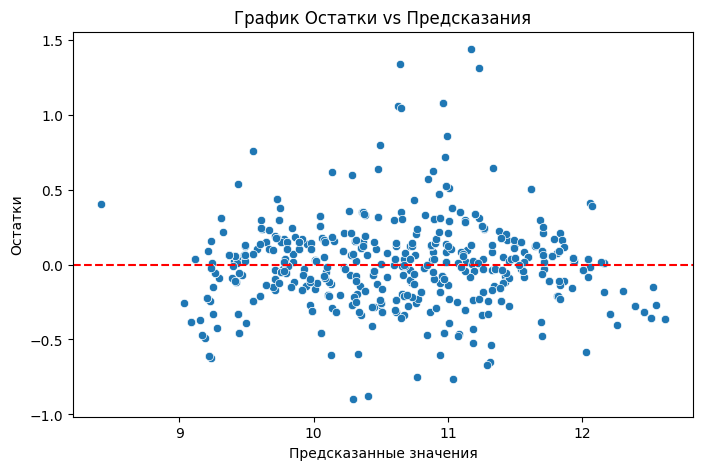

In [188]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

Выше видим, что нет явной гетероскидантичность, ну и ок =) Лучше глянем, что регрессия говорит о зависимости цены от фичей

In [189]:
# Сортируем по абсолютному значению коэффициента - показываем фичи, которые "сильнее всего" влияют на логарифм цены
coef_df = pd.DataFrame({
    "feature": model_sm.params.index,
    "coef": model_sm.params.values,
    "pvalue": model_sm.pvalues
})

coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df.sort_values("abs_coef", ascending=False)



,feature,coef,pvalue,abs_coef
const,const,-124.855534,4.686593e-04,124.855534
brand_Apple,brand_Apple,0.795878,4.690158e-23,0.795878
is_new,is_new,0.510189,1.182638e-25,0.510189
is_5G,is_5G,0.363692,3.069836e-19,0.363692
strong_frame,strong_frame,0.196143,7.435608e-16,0.196143
brand_Samsung,brand_Samsung,0.189090,4.981399e-04,0.189090
brand_HONOR,brand_HONOR,0.130606,2.374826e-02,0.130606
main_cams,main_cams,0.103869,2.049443e-04,0.103869
frameless,frameless,0.101675,4.464275e-04,0.101675
brand_Infinix,brand_Infinix,0.072634,2.441460e-01,0.072634


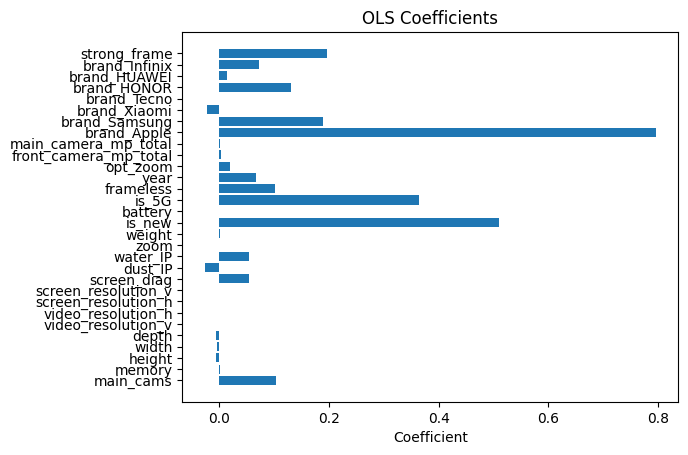

In [190]:
import matplotlib.pyplot as plt

coef_df = coef_df[coef_df.feature != "const"]

plt.figure()
plt.barh(coef_df["feature"], coef_df["coef"])
plt.xlabel("Coefficient")
plt.title("OLS Coefficients")
plt.show()


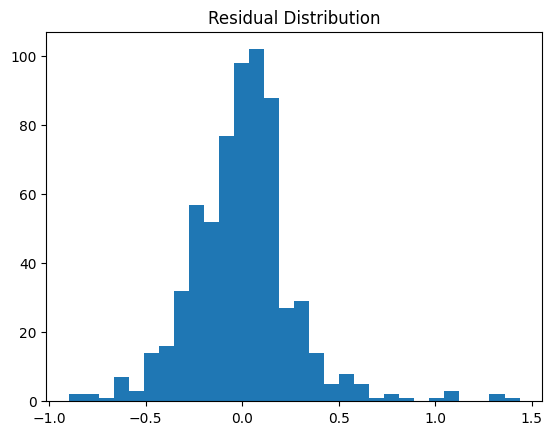

In [191]:
plt.figure()
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()


📊 Что видно по распределению остатков

Основная масса остатков сосредоточена около нуля

→ это хорошо: модель в среднем не смещена (нет сильного bias).
Есть выраженная правосторонняя асимметрия (длинный правый хвост)

→ присутствуют наблюдения, где модель сильно недооценивает цену
(реальная цена намного выше предсказанной).


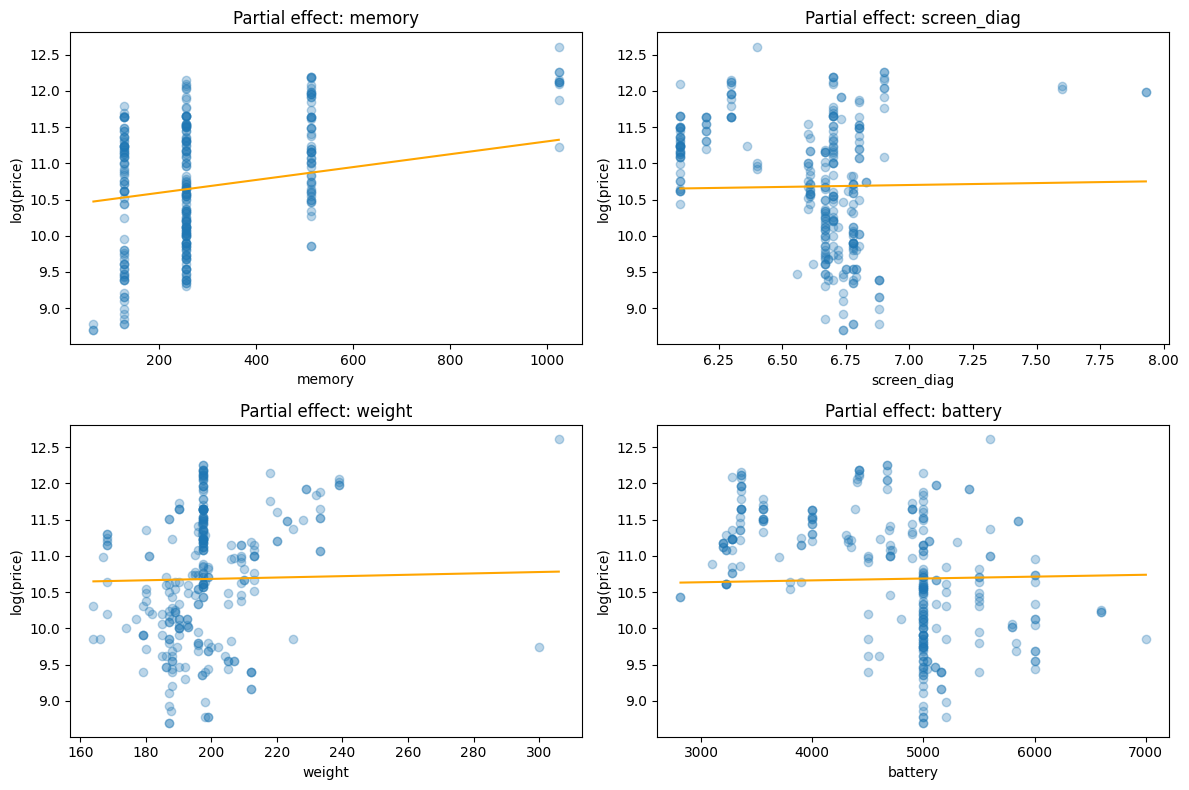

In [192]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

X_mean = X_filled.mean()

features_to_plot = ["memory", "screen_diag", "weight", "battery"]

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    
    x = X_test[feature]
    ax.scatter(x, y_test, alpha=0.3)
    
    x_line = np.linspace(x.min(), x.max(), 100)
    
    X_temp = pd.DataFrame([X_mean] * 100)
    X_temp[feature] = x_line
    X_temp = sm.add_constant(X_temp)
    
    y_pred = model_sm.predict(X_temp)
    
    ax.plot(x_line, y_pred, c='orange')
    ax.set_title(f"Partial effect: {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("log(price)")

plt.tight_layout()
plt.show()

### Подбираем функциональную форму, чтобы угадать некоторые нелинейные зависимости

In [194]:
X_train_old = X_train.copy()
X_test_old = X_test.copy()

In [195]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dims = X_train[['video_resolution_v', 'video_resolution_h']].copy()
dims_test = X_test[['video_resolution_v', 'video_resolution_h']].copy()

scaler = StandardScaler()
dims_scaled = scaler.fit_transform(dims)
dims_scaled_test = scaler.transform(dims_test)

pca = PCA(n_components=2)
dims_pca = pca.fit_transform(dims_scaled)
dims_pca_test = pca.transform(dims_scaled_test)

X_train['dim_PC1'] = dims_pca[:, 0]
X_train['dim_PC2'] = dims_pca[:, 1]

X_test['dim_PC1'] = dims_pca_test[:, 0]
X_test['dim_PC2'] = dims_pca_test[:, 1]

In [196]:
X_train['P'] = X_train['width'] + X_train['height']
X_train['IP'] = X_train['dust_IP'] + X_train['water_IP']
X_train = X_train.drop(columns=['width', 'height', 'dust_IP', 'water_IP', 'depth'])

X_test['P'] = X_test['width'] + X_test['height']
X_test['IP'] = X_test['dust_IP'] + X_test['water_IP']
X_test = X_test.drop(columns=['width', 'height', 'dust_IP', 'water_IP', 'depth'])

In [197]:
X_train['IP^2'] = np.square(X_train['IP'])
X_train['P^2'] = np.square(X_train['P'])

X_train['screen_resolution_h^2'] = np.square(X_train['screen_resolution_h'])
X_train['log_screen_resolution_v'] = np.log1p(X_train['screen_resolution_v'])
X_train['year^2'] = np.square(X_train['year'])
X_train['log_zoom'] = np.log1p(X_train['zoom'])

X_test['IP^2'] = np.square(X_test['IP'])
X_test['P^2'] = np.square(X_test['P'])

X_test['screen_resolution_h^2'] = np.square(X_test['screen_resolution_h'])
X_test['log_screen_resolution_v'] = np.log1p(X_test['screen_resolution_v'])
X_test['year^2'] = np.square(X_test['year'])
X_test['log_zoom'] = np.log1p(X_test['zoom'])

In [198]:
model_ols_best = sm.OLS(y_train, X_train).fit(cov_type='HC3')
residuals = model_ols_best.resid
print(model_ols_best.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     37.81
Date:                Sat, 21 Feb 2026   Prob (F-statistic):           2.82e-93
Time:                        22:59:21   Log-Likelihood:                -60.173
No. Observations:                 650   AIC:                             188.3
Df Residuals:                     616   BIC:                             340.6
Df Model:                          33                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

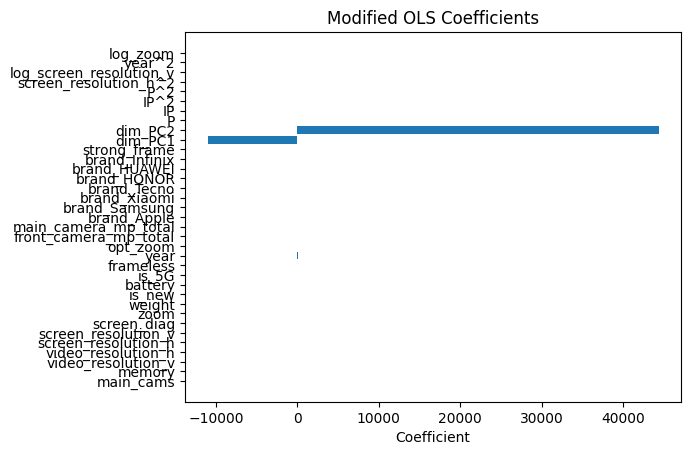

In [199]:
import matplotlib.pyplot as plt

coef_df = pd.DataFrame({
    "feature": model_ols_best.params.index,
    "coef": model_ols_best.params.values,
    "pvalue": model_ols_best.pvalues
})

coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df.sort_values("abs_coef", ascending=False)

coef_df = coef_df[coef_df.feature != "const"]

plt.figure()
plt.barh(coef_df["feature"], coef_df["coef"])
plt.xlabel("Coefficient")
plt.title("Modified OLS Coefficients")
plt.show()

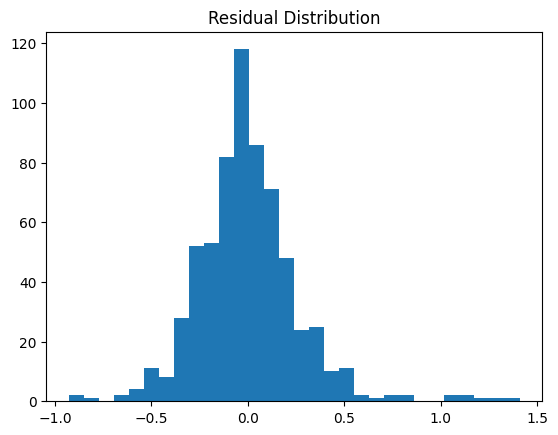

In [200]:
plt.figure()
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()

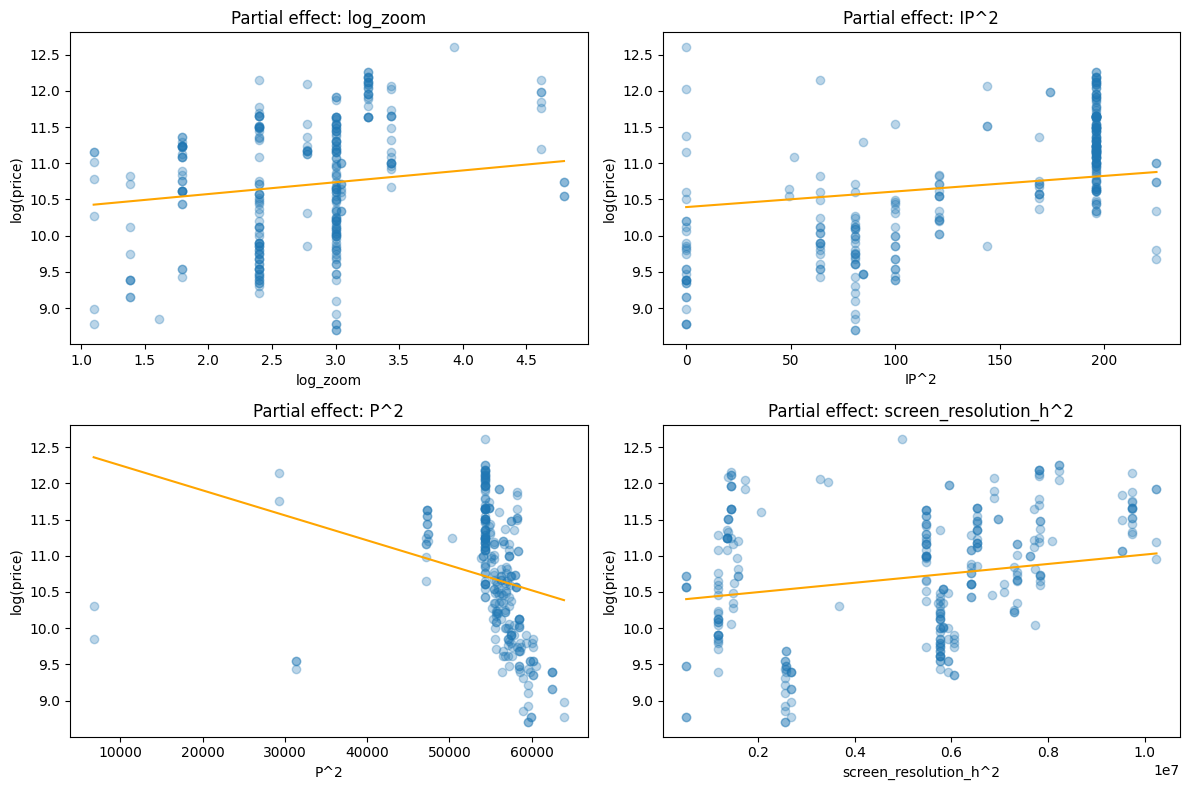

In [201]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

X_mean = X_test.mean()

features_to_plot = ["log_zoom", "IP^2", "P^2", "screen_resolution_h^2"]

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    
    x = X_test[feature]
    ax.scatter(x, y_test, alpha=0.3)
    
    x_line = np.linspace(x.min(), x.max(), 100)
    
    X_temp = pd.DataFrame([X_mean] * 100)
    X_temp[feature] = x_line
    X_temp = sm.add_constant(X_temp)
    
    y_pred = model_ols_best.predict(X_temp)
    
    ax.plot(x_line, y_pred, c='orange')
    ax.set_title(f"Partial effect: {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("log(price)")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_test = model_sm.predict(X_test_old)
y_pred_test2 = model_ols_best.predict(X_test)
residuals_test = y_test - y_pred_test
residuals_test2 = y_test - y_pred_test2


print("Test R2 in simple OLS:", r2_score(y_test, y_pred_test))
print("Test RMSE in simple OLS:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test MAE in simple OLS:", mean_absolute_error(y_test, y_pred_test))

print("Test R2 in modified OLS:", r2_score(y_test, y_pred_test2))
print("Test RMSE in modified OLS:", np.sqrt(mean_squared_error(y_test, y_pred_test2)))
print("Test MAE in modified OLS:", mean_absolute_error(y_test, y_pred_test2))

Test R2 in simple OLS: 0.8944281885435109
Test RMSE in simple OLS: 0.2836230152460871
Test MAE in simple OLS: 0.20222118164981673
Test R2 in modified OLS: 0.9000830019147006
Test RMSE in modified OLS: 0.275922535272891
Test MAE in modified OLS: 0.19763473879959587


### pyGAM

In [203]:
!pip install pygam



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [211]:
from pygam import LinearGAM, s
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X_filled.values, y.values, test_size=0.3, random_state=42
)
X_train = X_train_old.values
X_test = X_test_old.values

terms = s(0)
for i in range(1, X_train.shape[1]):
    terms += s(i)

gam = LinearGAM(terms).gridsearch(X_train, y_train)

y_pred = gam.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"GAM RMSE: {rmse:.4f}")


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:01
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:02 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


GAM RMSE: 0.3864


Partial dependence GAM - это "чистый эффект" переменной при фиксированных остальных.

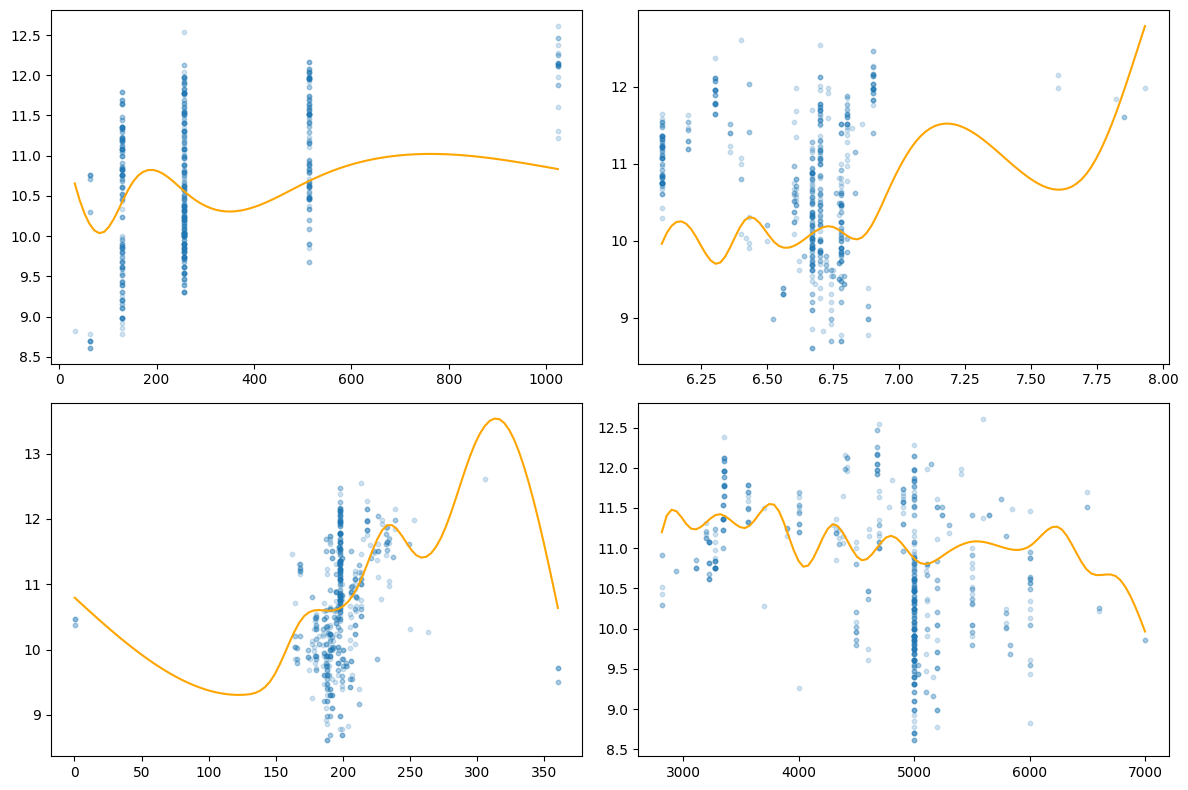

In [205]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

features_to_plot = ["memory", "screen_diag", "weight", "battery"]
feature_indices = [X_filled.columns.get_loc(f) for f in features_to_plot]

X_train = pd.DataFrame(X_train, columns=X_filled.columns)
X_test = pd.DataFrame(X_test, columns=X_filled.columns)

for i, (feature, idx) in enumerate(zip(features_to_plot, feature_indices)):
    ax = axes[i]

    ax.scatter(X_train[feature], y_train, alpha=0.2, s=10)

    XX = gam.generate_X_grid(term=idx)
    pdep = gam.partial_dependence(term=idx, X=XX)

    # центрируем
    pdep_centered = pdep + y_train.mean()

    ax.plot(XX[:, idx], pdep_centered, c='orange')


plt.tight_layout()
plt.show()



In [218]:
X_filled.columns

Index(['const', 'main_cams', 'memory', 'height', 'width', 'depth',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'zoom',
       'weight', 'is_new', 'battery', 'is_5G', 'frameless', 'year', 'opt_zoom',
       'front_camera_mp_total', 'main_camera_mp_total', 'brand_Apple',
       'brand_Samsung', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_HUAWEI', 'brand_Infinix', 'strong_frame'],
      dtype='object')

In [212]:
gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    166.9258
Link Function:                     IdentityLink Log Likelihood:                                   562.9917
Number of Samples:                          650 AIC:                                             -790.1318
                                                AICc:                                            -672.1999
                                                GCV:                                                0.0243
                                                Scale:                                              0.1157
                                                Pseudo R-Squared:                                   0.9869
Feature Function                  Lam

Ты увидишь:

edof (effective degrees of freedom)

p-values

Lambda (регуляризация)

📌 Что это означает:

p-value < 0.05 → признак статистически значим

edof ≈ 1 → эффект почти линейный

edof > 1 → есть нелинейность

🔥 Это очень сильный аргумент при сравнении с OLS:

Если edof >> 1, значит линейная модель недоспецифицирована.

In [207]:
import numpy as np

feature_importance = []

for i in range(X_filled.shape[1]):
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i, X=XX)
    importance = np.var(pdep)
    feature_importance.append(importance)

importance_df = pd.DataFrame({
    "feature": X_filled.columns,
    "importance": feature_importance
}).sort_values("importance", ascending=False)

print(importance_df)


                  feature  importance
5                   depth    8.783470
4                   width    5.623069
7      video_resolution_h    4.434336
3                  height    3.189234
14                 weight    1.599377
6      video_resolution_v    1.280653
9     screen_resolution_v    0.996441
11                dust_IP    0.862232
8     screen_resolution_h    0.622814
10            screen_diag    0.477550
22   main_camera_mp_total    0.163579
13                   zoom    0.131222
12               water_IP    0.095953
16                battery    0.084944
2                  memory    0.079553
21  front_camera_mp_total    0.074905
20               opt_zoom    0.042339
15                 is_new    0.009776
19                   year    0.008969
1               main_cams    0.007665
17                  is_5G    0.004861
28           brand_HUAWEI    0.002732
26            brand_Tecno    0.001537
30           strong_frame    0.000855
24          brand_Samsung    0.000421
27          

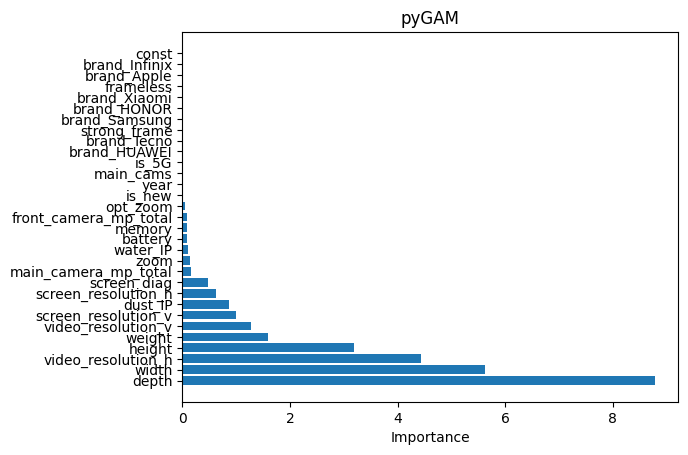

In [208]:
plt.figure()
plt.barh(importance_df["feature"], importance_df["importance"])
plt.xlabel("Importance")
plt.title("pyGAM")
plt.show()

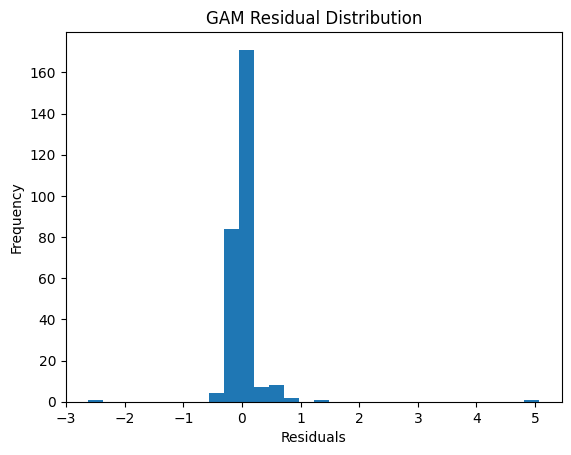

In [214]:
import matplotlib.pyplot as plt
import numpy as np

# предсказания
y_pred_gam = gam.predict(X_test)

# остатки
residuals_gam = y_test - y_pred_gam

plt.figure()
plt.hist(residuals_gam, bins=30)
plt.title("GAM Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [215]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


print("Test R2 in GAM:", r2_score(y_test, y_pred_gam))
print("Test RMSE in GAM:", np.sqrt(mean_squared_error(y_test, y_pred_gam)))
print("Test MAE in GAM:", mean_absolute_error(y_test, y_pred_gam))

print("Test R2 in modified OLS:", r2_score(y_test, y_pred_test2))
print("Test RMSE in modified OLS:", np.sqrt(mean_squared_error(y_test, y_pred_test2)))
print("Test MAE in modified OLS:", mean_absolute_error(y_test, y_pred_test2))

Test R2 in GAM: 0.8040835380119813
Test RMSE in GAM: 0.3863695994776175
Test MAE in GAM: 0.1316089001163188
Test R2 in modified OLS: 0.9000830019147006
Test RMSE in modified OLS: 0.275922535272891
Test MAE in modified OLS: 0.19763473879959587
